In [4]:
import fns
from fns import *
from fns.functionsTF import *
%matplotlib inline
from tqdm import tnrange, tqdm_notebook
from joblib import Parallel, delayed


today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000_PhD/figures/"+todayStr+"/")
CSV_DIR_TODAY = os.path.expanduser("~/Dropbox/0000_PhD/csv/"+todayStr+"/")
CSV_DIR = os.path.expanduser("~/Dropbox/0000_PhD/csv/")
FIG_DIR = os.path.expanduser("~/Dropbox/0000_PhD/figures/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)
    
from bokeh.io import output_notebook
output_notebook()
from IPython.display import clear_output, Image, display

Loading BokehJS ...

In [12]:
def f(w=15,h=4):
    plt.figure(figsize=(w,h), linewidth=0.01)

In [51]:
N = 1000
NI = int(0.2*N)
NE = N-NI
EE = np.ones((NE, NE))
II = np.ones((NI,NI))*2

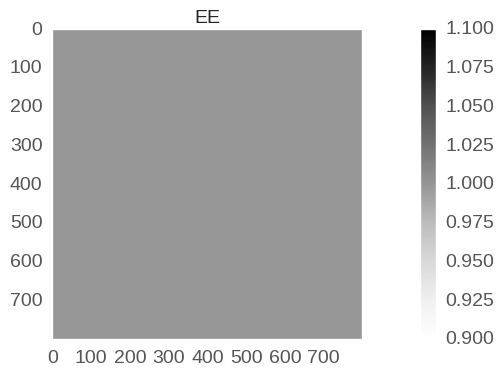

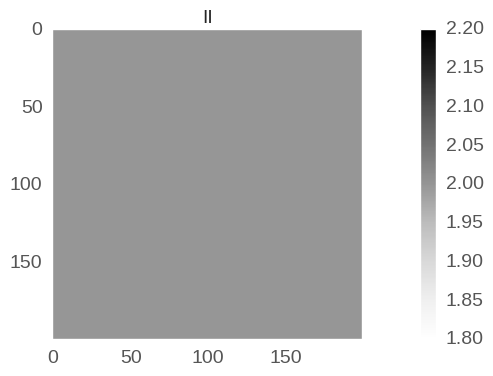

In [52]:
f()
plt.imshow(EE)
plt.colorbar()
plt.title('EE')

f()
plt.imshow(II)
plt.colorbar()
plt.title('II')

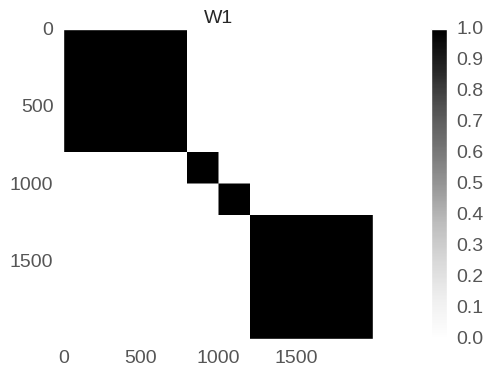

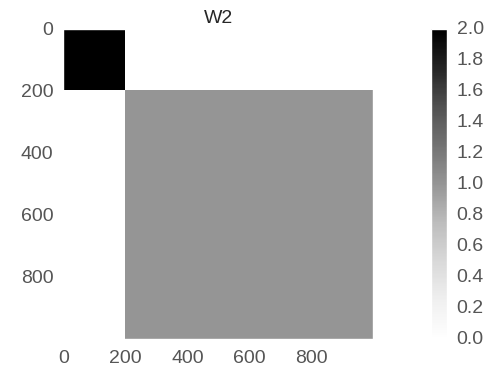

In [53]:
W1 = np.zeros((N,N))
W1[:NE, :NE]=EE
W1[-NI:, -NI:] = II
f()
plt.imshow(W)
plt.colorbar()
plt.title('W1')

f()
W2=W1[::-1,::-1]
plt.imshow(W2)
plt.colorbar()
plt.title('W2')

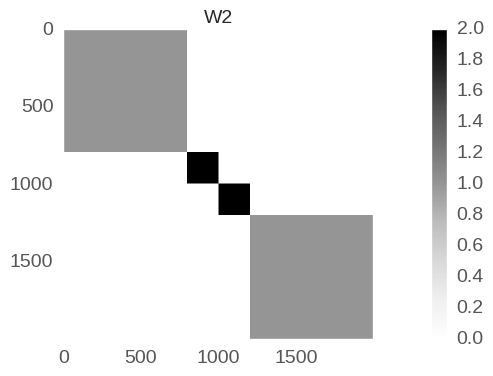

In [57]:
W0 = np.zeros((2*N, 2*N))
W = W0.copy()
W[:N,:N] = W1
W[-N:,-N:] = W2

f()
plt.imshow(W)
plt.colorbar()
plt.title('W2')

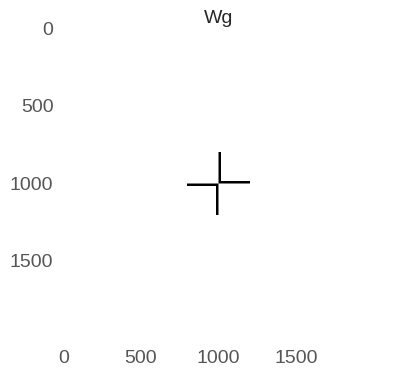

In [84]:
def add_shared_gap(W_, n, wii):
    W = W_.copy()
    N = W.shape[0]//2
    W[N-NI:N, N:N+n] = wii
    W[N:N+NI, N-n:N] = wii
    W[N:N+n, N-NI:N] = wii
    W[N-n:N, N:N+NI] = wii
    return W

Wg = add_shared_gap(W0, 15, 3)

f()
plt.imshow(Wg)
# plt.colorbar()
plt.title('Wg')

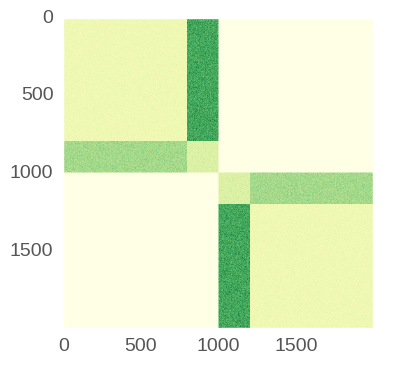

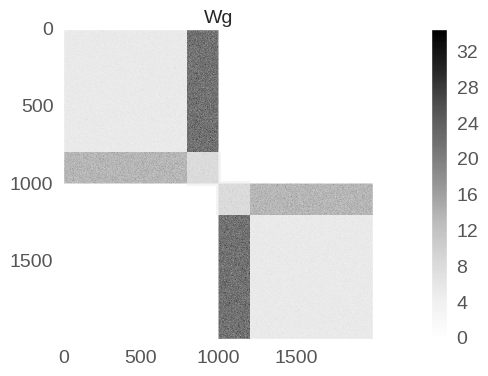

In [118]:
wee1 = 2
wee2 = 2
wii1 = 3
wii2 = 3

wie1 = 5
wei1 = 8
wie2 = 5
wei2 = 8

W0 = np.zeros((2*N, 2*N))

#WEE1
WEE1 = W0.copy()
WEE1[:NE,:NE]=wee1


#WEE2
WEE2 = W0.copy()
WEE2[-NE:,-NE:]=wee2

#WII1
WII1 = W0.copy()
WII1[NE:N,NE:N]=wii1

#WII1
WII2 = W0.copy()
WII2[N:N+NI,N:N+NI]=wii2

#WIE1
WIE1 = W0.copy()
WIE1[NE:N, :NE]=wie1

#WEI1
WEI1 = W0.copy()
WEI1[:NE, NE:N]=wei1

#WIE2
WIE2 = W0.copy()
WIE2[N:N+NI, -NE:]=wie2

#WEI2
WEI2 = W0.copy()
WEI2[-NE:, N:N+NI]=wei2

W = (WEE1 + WEE2 + WEI1 + WEI2 + WIE1 + WIE2 + WII1 + WII2)*np.random.lognormal(1,0.1,(2*N,2*N))
f()
plt.imshow(W, cmap=plt.cm.YlGn)

def add_shared_gap(W_, n, wii):
    W = W_.copy()
    N = W.shape[0]//2
    W[N-NI:N, N:N+n] = wii
    W[N:N+NI, N-n:N] = wii
    W[N:N+n, N-NI:N] = wii
    W[N-n:N, N:N+NI] = wii
    return W

Wg = add_shared_gap(W, 15, wii1)

f()
plt.imshow(Wg)
plt.title('Wg')
plt.colorbar()


0.0


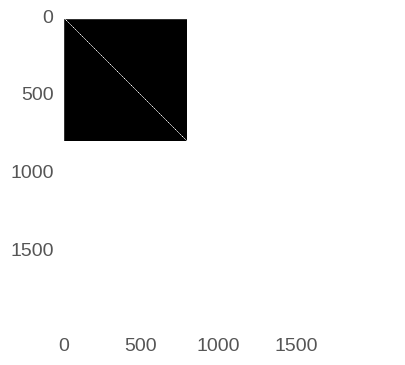

In [113]:
def diag(W):
    return W-np.diag(np.diag(W))

Wee1 = diag(WEE1)
plt.imshow(Wee1)
# plt.imshow(WEE1)
print(Wee1[0,0])